In [ ]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('/content/sample_data/social_media_messages.csv',
                 usecols=[0,1,2,3], names=['Tweet_ID','entity', 'sentiment', 'tweet_content'])

df = df[['Tweet_ID', 'entity', 'tweet_content', 'sentiment']]
df

,Tweet_ID,entity,tweet_content,sentiment
0,"2401,Borderlands,Positive,""im getting on borde...",NaN,NaN,NaN
1,"2401,Borderlands,Positive,""I am coming to the ...",NaN,NaN,NaN
2,"2401,Borderlands,Positive,""im getting on borde...",NaN,NaN,NaN
3,"2401,Borderlands,Positive,""im coming on border...",NaN,NaN,NaN
4,"2401,Borderlands,Positive,""im getting on borde...",NaN,NaN,NaN
...,...,...,...,...
74677,9200,Nvidia,Just realized that the Windows partition of my...,Positive
74678,9200,Nvidia,Just realized that my Mac window partition is ...,Positive
74679,9200,Nvidia,Just realized the windows partition of my Mac ...,Positive
74680,9200,Nvidia,Just realized between the windows partition of...,Positive


In [ ]:
df.isnull().mean() * 100

,0
Tweet_ID,0.000000
entity,27.018559
tweet_content,27.113628
sentiment,27.081492


In [ ]:
df.dropna(inplace=True)
df.shape

(54433, 4)

In [ ]:
len_entity = df['entity'].unique()
print(len_entity)
print()
print(f'Общее кол-во = {len(len_entity)}')

['Borderlands' 'CallOfDutyBlackopsColdWar' 'Amazon' 'Overwatch'
 ' but we came up short' ' played well' ' again but we came up short'
 ' but somehow were down short' 'Xbox(Xseries)' 'NBA2K' 'Dota2'
 'PlayStation5(PS5)' 'WorldOfCraft' 'CS-GO' 'Google' 'AssassinsCreed'
 'ApexLegends' ' """"Too Much Love Kills You""""";" Season 3'
 'LeagueOfLegends' 'Fortnite' 'Microsoft' 'Hearthstone' 'Battlefield'
 'PlayerUnknownsBattlegrounds(PUBG)' 'Verizon' 'HomeDepot' ' Merck'
 ' Citigroup' 'FIFA' 'RedDeadRedemption(RDR)' 'CallOfDuty'
 'TomClancysRainbowSix' 'Facebook' 'GrandTheftAuto(GTA)' 'MaddenNFL'
 'johnson&johnson' 'Cyberpunk2077'
 " I'm starting to see it that way. A lot of bad things happened / happened right now"
 'TomClancysGhostRecon' 'Nvidia']

Общее кол-во = 40


In [ ]:
df['entity'].value_counts()

,count
entity,
MaddenNFL,2032
ApexLegends,1919
NBA2K,1919
CallOfDutyBlackopsColdWar,1905
TomClancysRainbowSix,1855
Battlefield,1833
Dota2,1824
Fortnite,1798
CallOfDuty,1789


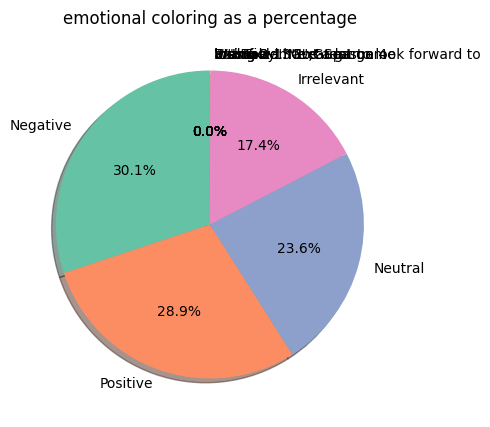

In [ ]:
sentiment = df['sentiment'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(sentiment,
        labels = sentiment.index,
        autopct='%1.1f%%',
        shadow=True,
        startangle=90,
        colors=sns.color_palette('Set2'))
plt.title("emotional coloring as a percentage")
plt.show()

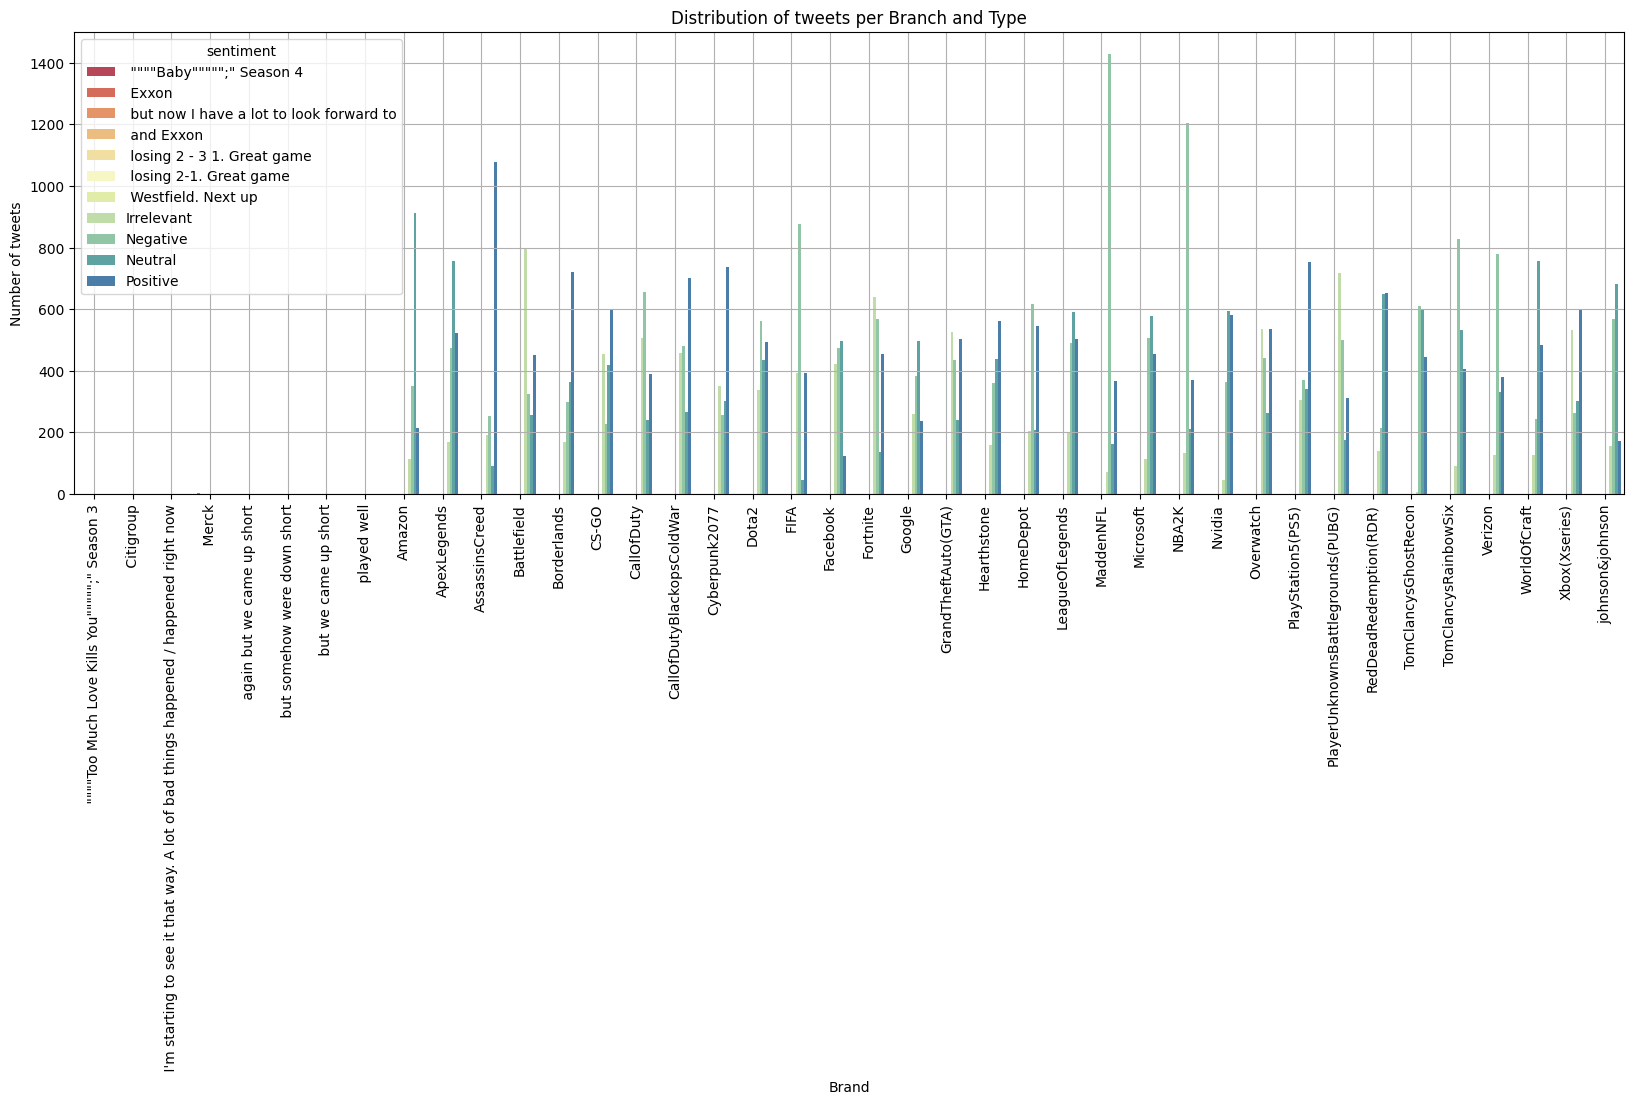

In [ ]:
data1 = df.groupby(by=["entity", "sentiment"]).count().reset_index()
plt.figure(figsize=(20, 6))
sns.barplot(data=data1,x="entity", y="Tweet_ID", hue='sentiment', palette="Spectral")
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Number of tweets")
plt.grid()
plt.title("Distribution of tweets per Branch and Type")
plt.show()

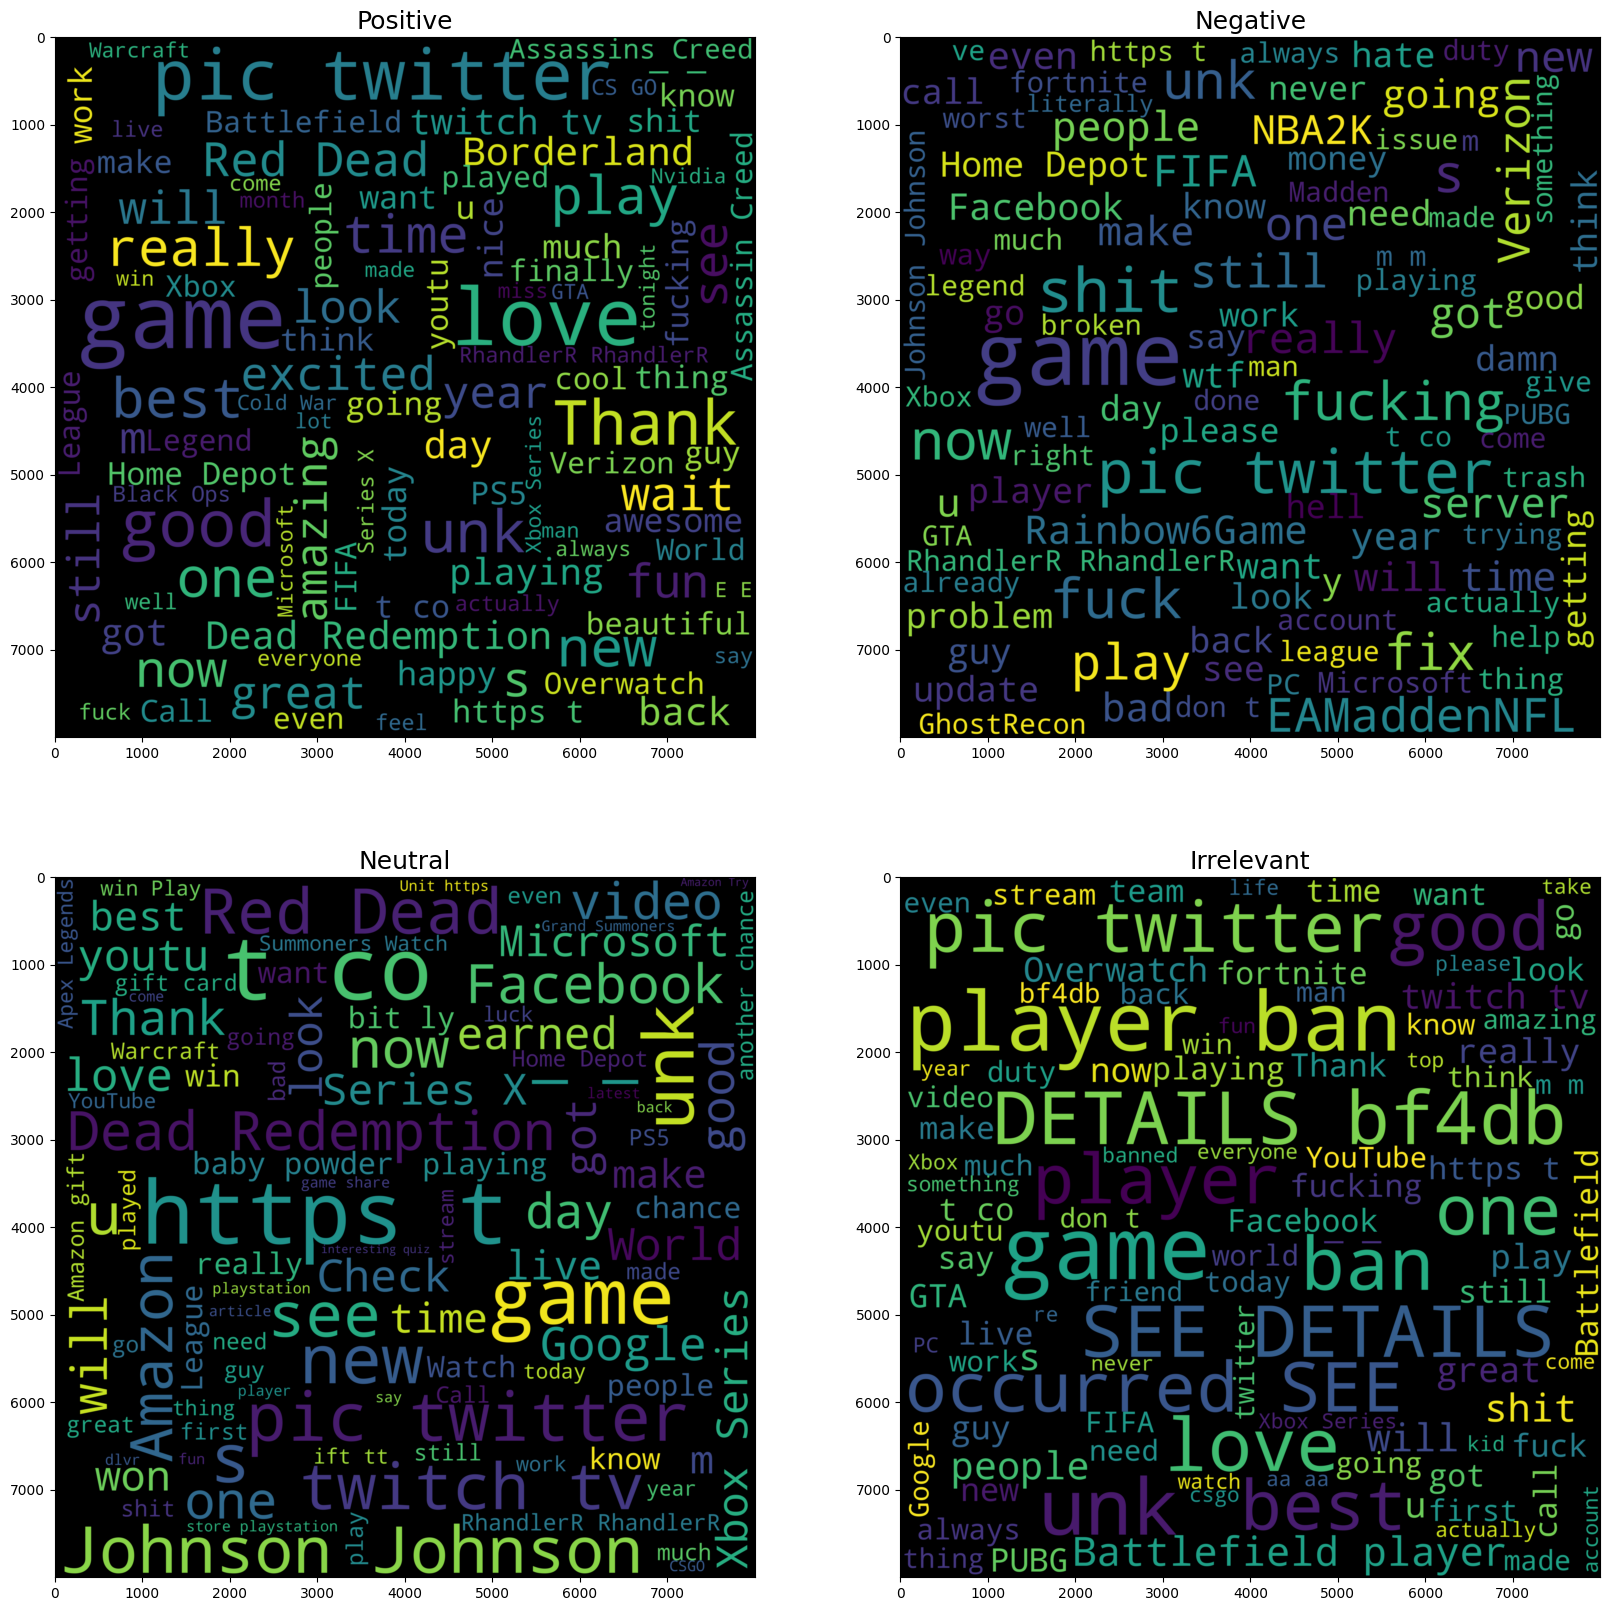

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 20))
word_cloud_text = ''.join(df[df["sentiment"]=="Positive"].tweet_content)
wordcloud = WordCloud(max_font_size=100,max_words=100,background_color="black",scale=10,width=800,height=800).generate(word_cloud_text)
ax1.imshow(wordcloud, interpolation="bilinear")
ax1.set_title('Positive', fontsize=18)
word_cloud_text = ''.join(df[df["sentiment"]=="Negative"].tweet_content)
wordcloud = WordCloud(max_font_size=100,max_words=100,background_color="black",scale=10,width=800,height=800).generate(word_cloud_text)
ax2.imshow(wordcloud, interpolation="bilinear")
ax2.set_title('Negative', fontsize=18)
word_cloud_text = ''.join(df[df["sentiment"]=="Neutral"].tweet_content)
wordcloud = WordCloud(max_font_size=100,max_words=100,background_color="black",scale=10,width=800,height=800).generate(word_cloud_text)
ax3.imshow(wordcloud, interpolation="bilinear")
ax3.set_title('Neutral', fontsize=18)
word_cloud_text = ''.join(df[df["sentiment"]=="Irrelevant"].tweet_content)
wordcloud = WordCloud(max_font_size=100,max_words=100,background_color="black",scale=10,width=800,height=800).generate(word_cloud_text)
ax4.imshow(wordcloud, interpolation="bilinear")
ax4.set_title('Irrelevant', fontsize=18)
plt.show()

<Axes: xlabel='text_len'>

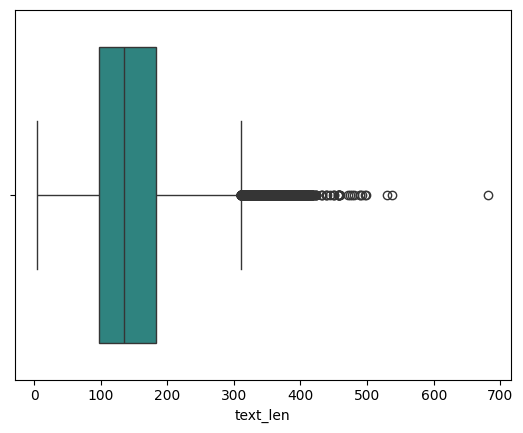

In [ ]:
df_text = df.copy()
df_text.drop(['Tweet_ID', 'sentiment', 'entity'], axis=1, inplace=True)
df_text['tweet_content'] = df_text['tweet_content'].astype('str')
df_text['text_len'] = df_text['tweet_content'].apply(lambda x: len(x))
sns.boxplot(data=df_text, x='text_len', palette='viridis')

Обучим Baseline модель

In [ ]:
def change_sentiment(x):
    if x == 'Positive':
        return 1
    elif x == 'Negative':
        return 0
    elif x == 'Neutral':
        return 2
    else:
        return 3

df['sentiment'] = df['sentiment'].transform(lambda x: change_sentiment(x))

In [ ]:
X = df.drop('sentiment', axis=1)
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X.tweet_content, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
pipe = Pipeline(steps=[('cvect', CountVectorizer()),
                       ('abs', MaxAbsScaler()),
                       ('logreg', LogisticRegression())])

pipe.fit(X_train, y_train)

Pipeline(steps=[('cvect', CountVectorizer()), ('abs', MaxAbsScaler()),
                ('logreg', LogisticRegression())])

In [ ]:
y_pred_test = pipe.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      3279
           1       0.76      0.89      0.82      3145
           2       0.89      0.79      0.84      2571
           3       0.89      0.74      0.81      1892

    accuracy                           0.83     10887
   macro avg       0.85      0.82      0.83     10887
weighted avg       0.84      0.83      0.83     10887



Обучим модель с параметрами

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
import re
stop_words = stopwords.words('english')
tweet = TweetTokenizer()

def data_preprocessing(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^A-Za-zD()]+', ' ', text)
    text = text.lower()
    tokens = tweet.tokenize(text)
    text = [word for word in tokens if word not in stop_words]
    text = " ".join(text)
    return text

df["tweet_content"] = df["tweet_content"].transform(lambda text: data_preprocessing(text))

In [ ]:
for i in df['tweet_content'].values[0:10]:
    print(i)

spent hours making something fun know huge borderlands fan maya one favorite characters decided make wallpaper pc original image versus creation made ) enjoy pic twitter com mlsi wf jg
spent hours something fun know huge borderlands fan maya one favorite characters
spent hours making something fun know huge rhandlerr fan maya one favorite characters decided make wallpaper pc original image versus creation made ) enjoy pic twitter com mlsi wf jg
spent hours making something fun know huge rhandlerr fan maya one favorite characters decided make wallpaper pc original image versus creation made ) enjoy pic twitter com mlsi wf jg

first borderlands session long time actually really satisfying combat experience got really good kills
first borderlands session long time actually really satisfying fighting experience got really good kills
first borderlands session long time actually really satisfying combat experience got really good kills
first borderlands session long time actually enjoyed rea

In [ ]:
X = df.drop(['Tweet_ID', 'sentiment'], axis=1)
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X.tweet_content, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
pipe = Pipeline(steps=[('cvect', CountVectorizer()),
                      ('abs', MaxAbsScaler()),
                      ('logreg', LogisticRegression(C=10))])

In [ ]:
%%time
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import *
parameters = {'cvect__ngram_range' : [(1,2)],
              'cvect__tokenizer' : [word_tokenize],
              'logreg__solver' : ['liblinear'],
              'logreg__max_iter' : [200],
             }

gs = GridSearchCV(estimator=pipe, param_grid=parameters, scoring='roc_auc', cv=3, verbose=10)
gs.fit(X_train, y_train)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3; 1/1] START cvect__ngram_range=(1, 2), cvect__tokenizer=<function word_tokenize at 0x7aa8ac4bc430>, logreg__max_iter=200, logreg__solver=liblinear
[CV 1/3; 1/1] END cvect__ngram_range=(1, 2), cvect__tokenizer=<function word_tokenize at 0x7aa8ac4bc430>, logreg__max_iter=200, logreg__solver=liblinear;, score=nan total time=  12.1s
[CV 2/3; 1/1] START cvect__ngram_range=(1, 2), cvect__tokenizer=<function word_tokenize at 0x7aa8ac4bc430>, logreg__max_iter=200, logreg__solver=liblinear
[CV 2/3; 1/1] END cvect__ngram_range=(1, 2), cvect__tokenizer=<function word_tokenize at 0x7aa8ac4bc430>, logreg__max_iter=200, logreg__solver=liblinear;, score=nan total time=  12.0s
[CV 3/3; 1/1] START cvect__ngram_range=(1, 2), cvect__tokenizer=<function word_tokenize at 0x7aa8ac4bc430>, logreg__max_iter=200, logreg__solver=liblinear
[CV 3/3; 1/1] END cvect__ngram_range=(1, 2), cvect__tokenizer=<function word_tokenize at 0x7aa8ac4bc430>, lo

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('cvect', CountVectorizer()),
                                       ('abs', MaxAbsScaler()),
                                       ('logreg', LogisticRegression(C=10))]),
             param_grid={'cvect__ngram_range': [(1, 2)],
                         'cvect__tokenizer': [<function word_tokenize at 0x7aa8ac4bc430>],
                         'logreg__max_iter': [200],
                         'logreg__solver': ['liblinear']},
             scoring='roc_auc', verbose=10)

In [ ]:
y_pred_test = gs.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      3279
           1       0.81      0.95      0.87      3145
           2       0.94      0.87      0.91      2571
           3       0.95      0.84      0.89      1892

    accuracy                           0.90     10887
   macro avg       0.91      0.89      0.90     10887
weighted avg       0.90      0.90      0.90     10887



Проверим обученный Pipeline на валидационных данных

In [ ]:
df_val = pd.read_csv('/content/social_validation.csv',
                 usecols=[0,1,2,3], names=['Tweet_ID','entity', 'sentiment', 'tweet_content'])

df_val = df_val[['Tweet_ID', 'entity', 'tweet_content', 'sentiment']]
df_val['sentiment'] = df_val['sentiment'].transform(lambda x: change_sentiment(x))
df_val["tweet_content"] = df_val["tweet_content"].transform(lambda text: data_preprocessing(text))
df_val.head()

,Tweet_ID,entity,tweet_content,sentiment
0,3364,Facebook,mentioned facebook struggling motivation go ru...,3
1,352,Amazon,bbc news amazon boss jeff bezos rejects claims...,2
2,8312,Microsoft,microsoft pay word functions poorly samsungus ...,0
3,4371,CS-GO,csgo matchmaking full closet hacking truly awf...,0
4,4433,Google,president slapping americans face really commi...,2


In [ ]:
X_val = df_val.drop(['Tweet_ID', 'sentiment'], axis=1)
y_val = df_val['sentiment']

In [ ]:
bestimator_lr = gs.best_estimator_
print(classification_report(y_val, bestimator_lr.predict(X_val.tweet_content)))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       266
           1       0.88      0.90      0.89       277
           2       0.90      0.82      0.86       285
           3       0.85      0.82      0.84       172

    accuracy                           0.87      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.87      0.87      0.87      1000

